In [70]:
pip install --upgrade scikit-learn
pip install statsmodels
pip install mlxtend
pip install imblearn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 5.6 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.0/9.0 MB 3.5 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 298.0/298.0 KB 3.9 MB/s eta 0:00:00a 0:00:01
  Attempting uninstall: joblib
    Found existing installation: joblib 1.0.1
    Uninstalling joblib-1.0.1:
      Successfully uninstalled joblib-1.0.1
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 0.24.2
    Uninstalling scikit-learn-0.24.2:
      Successfully uninstalled scikit-learn-0.24.2
You should consider upgrading via the '/Users/jenniferchessa/opt/anaconda3/bin/python -m pip install --upgrade pip' command.


In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt
import seaborn as sns

## Dataset Overview

In [2]:
# Importing the dataset
dataset = pd.read_csv('ICU.csv', index_col=False)
dataset.drop(dataset.columns[0], axis=1, inplace=True)
dataset.head()

,ID,Survive,Age,AgeGroup,Sex,Infection,SysBP,Pulse,Emergency
0,4,0,87,3,1,1,80,96,1
1,8,1,27,1,1,1,142,88,1
2,12,1,59,2,0,0,112,80,1
3,14,1,77,3,0,0,100,70,0
4,27,0,76,3,1,1,128,90,1


In [3]:
dataset.columns

Index(['ID', 'Survive', 'Age', 'AgeGroup', 'Sex', 'Infection', 'SysBP',
       'Pulse', 'Emergency'],
      dtype='object')

In [4]:
dataset.isnull().sum()

ID           0
Survive      0
Age          0
AgeGroup     0
Sex          0
Infection    0
SysBP        0
Pulse        0
Emergency    0
dtype: int64

There is no null values.

In [5]:
dataset.describe()

,ID,Survive,Age,AgeGroup,Sex,Infection,SysBP,Pulse,Emergency
count,200.00000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.00000,200.000000
mean,444.82000,0.800000,57.545000,2.025000,0.380000,0.420000,132.280000,98.92500,0.735000
std,271.91668,0.401004,20.054648,0.785788,0.486604,0.494797,32.952099,26.82962,0.442441
min,4.00000,0.000000,16.000000,1.000000,0.000000,0.000000,36.000000,39.00000,0.000000
25%,210.25000,1.000000,46.750000,1.000000,0.000000,0.000000,110.000000,80.00000,0.000000
50%,412.50000,1.000000,63.000000,2.000000,0.000000,0.000000,130.000000,96.00000,1.000000
75%,671.75000,1.000000,72.000000,3.000000,1.000000,1.000000,150.000000,118.25000,1.000000
max,929.00000,1.000000,92.000000,3.000000,1.000000,1.000000,256.000000,192.00000,1.000000


In [6]:
dataset.dtypes

ID           int64
Survive      int64
Age          int64
AgeGroup     int64
Sex          int64
Infection    int64
SysBP        int64
Pulse        int64
Emergency    int64
dtype: object

In [7]:
# Checking the correlation between each features
corr = dataset.corr()
corr

,ID,Survive,Age,AgeGroup,Sex,Infection,SysBP,Pulse,Emergency
ID,1.000000,0.090088,-0.133796,-0.092947,0.004507,-0.129038,0.007579,0.027351,0.199467
Survive,0.090088,1.000000,-0.189458,-0.191370,-0.020602,-0.182349,0.204672,-0.031761,-0.243580
Age,-0.133796,-0.189458,1.000000,0.899328,0.096077,0.153555,0.042594,0.037368,-0.186957
AgeGroup,-0.092947,-0.191370,0.899328,1.000000,0.106451,0.102104,0.044558,0.022495,-0.197658
Sex,0.004507,-0.020602,0.096077,0.106451,1.000000,0.022541,0.049428,0.039530,0.119972
Infection,-0.129038,-0.182349,0.153555,0.102104,0.022541,1.000000,-0.228539,0.310512,0.166648
SysBP,0.007579,0.204672,0.042594,0.044558,0.049428,-0.228539,1.000000,-0.056582,-0.184111
Pulse,0.027351,-0.031761,0.037368,0.022495,0.039530,0.310512,-0.056582,1.000000,0.175269
Emergency,0.199467,-0.243580,-0.186957,-0.197658,0.119972,0.166648,-0.184111,0.175269,1.000000


The table above shows that Age and AgeGroup are highly correlated to each other, as expected.

## Normalizing Data

As the columns contain data of different ranges, we should normalize the data (except for the column ID, as we will not use it for training/testing).

In [8]:
# Normalize the data (minus ID)
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(dataset.iloc[:,1:].values)
scaled_df = pd.DataFrame(x_scaled, columns=dataset.iloc[:,1:].columns)
scaled_df.insert(loc=0, column='ID', value=dataset['ID'])
scaled_df

,ID,Survive,Age,AgeGroup,Sex,Infection,SysBP,Pulse,Emergency
0,4,0.0,0.934211,1.0,1.0,1.0,0.200000,0.372549,1.0
1,8,1.0,0.144737,0.0,1.0,1.0,0.481818,0.320261,1.0
2,12,1.0,0.565789,0.5,0.0,0.0,0.345455,0.267974,1.0
3,14,1.0,0.802632,1.0,0.0,0.0,0.290909,0.202614,0.0
4,27,0.0,0.789474,1.0,1.0,1.0,0.418182,0.333333,1.0
...,...,...,...,...,...,...,...,...,...
195,921,0.0,0.447368,0.5,1.0,0.0,1.000000,0.163399,1.0
196,923,1.0,0.052632,0.0,0.0,0.0,0.309091,0.287582,1.0
197,924,1.0,0.750000,1.0,1.0,0.0,0.572727,0.398693,1.0
198,925,1.0,0.565789,0.5,0.0,0.0,0.290909,0.320261,1.0


## Exporting to SQL Database

To store the data, we can export the data in tidy format to SQLite3 database.

In [9]:
# Split the dataframe into separate dataframes
patients = scaled_df[['ID','Age','AgeGroup','Sex']]
admissions = scaled_df[['ID','Infection','SysBP','Pulse','Emergency','Survive']]

In [10]:
patients.head()

,ID,Age,AgeGroup,Sex
0,4,0.934211,1.0,1.0
1,8,0.144737,0.0,1.0
2,12,0.565789,0.5,0.0
3,14,0.802632,1.0,0.0
4,27,0.789474,1.0,1.0


In [11]:
admissions.head()

,ID,Infection,SysBP,Pulse,Emergency,Survive
0,4,1.0,0.200000,0.372549,1.0,0.0
1,8,1.0,0.481818,0.320261,1.0,1.0
2,12,0.0,0.345455,0.267974,1.0,1.0
3,14,0.0,0.290909,0.202614,0.0,1.0
4,27,1.0,0.418182,0.333333,1.0,0.0


In [12]:
import sqlite3

conn = sqlite3.connect("icu.db")

In [13]:
print(conn.total_changes)

0


In [14]:
cur = conn.cursor()
patients.to_sql('patients', con=conn, if_exists="replace", index=False)
admissions.to_sql('admissions', con=conn, if_exists="replace", index=False)

In [15]:
sql_query = """
    SELECT name FROM sqlite_master
    WHERE type='table';
"""
cur.execute(sql_query)
print(cur.fetchall())

[('patients',), ('admissions',)]


In [16]:
sql_query = """
    SELECT * FROM patients
"""
patients_df = pd.read_sql(sql_query,conn)

In [17]:
sql_query = """
    SELECT * FROM admissions
"""
admissions_df = pd.read_sql(sql_query, conn)

In [18]:
sql_query = """
    SELECT A.ID, A.Age, A.AgeGroup, A.Sex, B.Infection, B.SysBP, B.Pulse, B.Emergency, B.Survive
    FROM patients A
    LEFT JOIN admissions B
    ON A.ID = B.ID;
"""
full_df = pd.read_sql(sql_query, conn)
full_df.head()

,ID,Age,AgeGroup,Sex,Infection,SysBP,Pulse,Emergency,Survive
0,4,0.934211,1.0,1.0,1.0,0.200000,0.372549,1.0,0.0
1,8,0.144737,0.0,1.0,1.0,0.481818,0.320261,1.0,1.0
2,12,0.565789,0.5,0.0,0.0,0.345455,0.267974,1.0,1.0
3,14,0.802632,1.0,0.0,0.0,0.290909,0.202614,0.0,1.0
4,27,0.789474,1.0,1.0,1.0,0.418182,0.333333,1.0,0.0


## Visualising Data

Let's check if the data is balanced.

In [19]:
sql_query = """
    SELECT Survive, COUNT(Survive) AS Count
    FROM admissions 
    GROUP BY Survive;
"""
survive_df = pd.read_sql(sql_query, conn)
survive_df

,Survive,Count
0,0.0,40
1,1.0,160


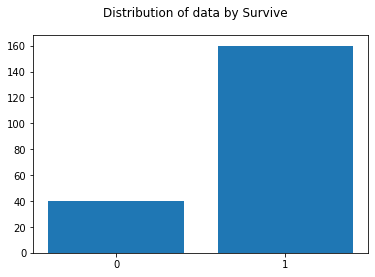

In [20]:
names = ['0','1']
plt.bar(names, survive_df['Count'])
plt.suptitle('Distribution of data by Survive')
plt.show()

As there are more people who survived than those who did not in the dataset, the dataset is therefore, **imbalanced**.

Now let's see the proportion of Survive and Not Survive patients in each of the features.

In [21]:
# AgeGroup Distribution
sql_query = """
    SELECT AgeGroup, COUNT(AgeGroup) AS Count
    FROM patients 
    GROUP BY AgeGroup;
"""
age_group_df = pd.read_sql(sql_query, conn)
age_group_df

,AgeGroup,Count
0,0.0,59
1,0.5,77
2,1.0,64


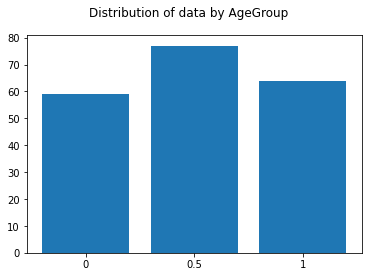

In [22]:
names = ['0','0.5','1']
plt.bar(names, age_group_df['Count'])
plt.suptitle('Distribution of data by AgeGroup')
plt.show()

The dataset contains quite a balanced distribution of patients from different AgeGroup.

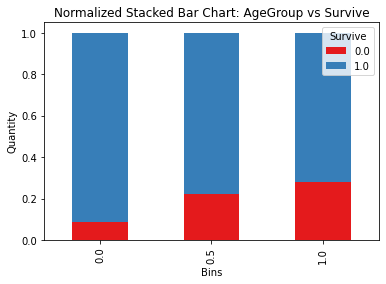

In [23]:
pal = sns.color_palette("Set1")

# creating a crosstab stacked bar chart variable
chart = pd.crosstab(full_df['AgeGroup'],full_df['Survive'])

# normalizing chart and plotting chart
chart.div(chart.sum(1).astype(float), axis=0).plot(kind='bar', color = pal,stacked=True)
plt.xlabel('Bins')
plt.ylabel('Quantity')
plt.title('Normalized Stacked Bar Chart: AgeGroup vs Survive')
plt.show()

The proportion of Survive patients **decreases** as the AgeGroup increases.

In [24]:
# Sex Distribution

sql_query = """
    SELECT Sex, COUNT(Sex) AS Count
    FROM patients 
    GROUP BY Sex;
"""
sex_df = pd.read_sql(sql_query, conn)
sex_df

,Sex,Count
0,0.0,124
1,1.0,76


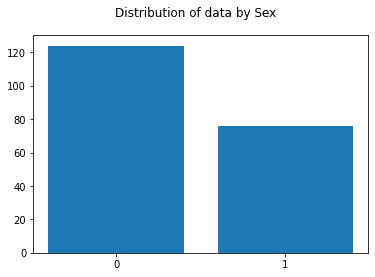

In [25]:
names = ['0','1']
plt.bar(names, sex_df['Count'])
plt.suptitle('Distribution of data by Sex')
plt.show()

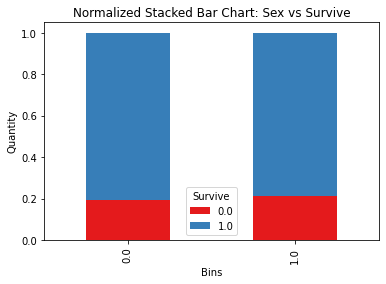

In [26]:
pal = sns.color_palette("Set1")

# creating a crosstab stacked bar chart variable
chart = pd.crosstab(full_df['Sex'],full_df['Survive'])

# normalizing chart and plotting chart
chart.div(chart.sum(1).astype(float), axis=0).plot(kind='bar', color = pal,stacked=True)
plt.xlabel('Bins')
plt.ylabel('Quantity')
plt.title('Normalized Stacked Bar Chart: Sex vs Survive')
plt.show()

The proportion of Survive patients in both Sex groups is relatively the same.

In [27]:
# Infection Distribution

sql_query = """
    SELECT Infection, COUNT(Infection) AS Count
    FROM admissions 
    GROUP BY Infection;
"""
infectn_df = pd.read_sql(sql_query, conn)
infectn_df

,Infection,Count
0,0.0,116
1,1.0,84


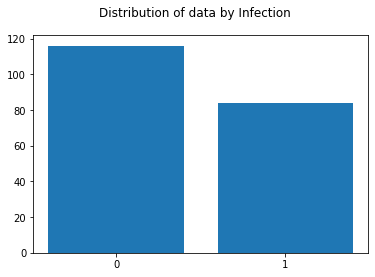

In [28]:
names = ['0','1']
plt.bar(names, infectn_df['Count'])
plt.suptitle('Distribution of data by Infection')
plt.show()

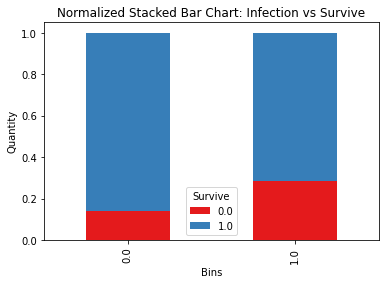

In [29]:
pal = sns.color_palette("Set1")

# creating a crosstab stacked bar chart variable
chart = pd.crosstab(full_df['Infection'],full_df['Survive'])

# normalizing chart and plotting chart
chart.div(chart.sum(1).astype(float), axis=0).plot(kind='bar', color = pal,stacked=True)
plt.xlabel('Bins')
plt.ylabel('Quantity')
plt.title('Normalized Stacked Bar Chart: Infection vs Survive')
plt.show()

We also see here that the proportion of Survive patients **decreases** as the Infection increases.

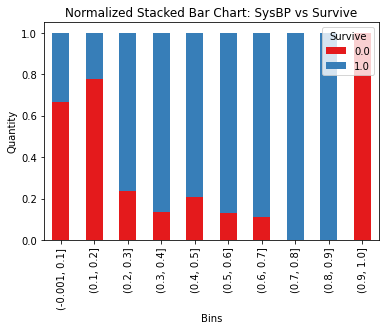

In [30]:
# SysBP

df = full_df
pal = sns.color_palette("Set1")

#creating new column in df with bin categories per feature
df['SysBP_binned'] = pd.cut(df['SysBP'], 10)

#creating a crosstab stacked bar chart variable
chart = pd.crosstab(df['SysBP_binned'],df['Survive'])

#normalizing chart and plotting chart
chart.div(chart.sum(1).astype(float), axis=0).plot(kind='bar', color = pal,stacked=True)
plt.xlabel('Bins')
plt.ylabel('Quantity')
plt.title('Normalized Stacked Bar Chart: SysBP vs Survive')
plt.show()

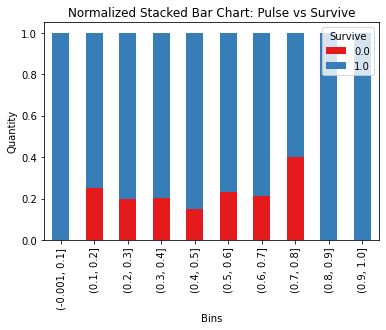

In [31]:
# Pulse

pal = sns.color_palette("Set1")

#creating new column in df with bin categories per feature
df['Pulse_binned'] = pd.cut(df['Pulse'], 10)

#creating a crosstab stacked bar chart variable
chart = pd.crosstab(df['Pulse_binned'],df['Survive'])

#normalizing chart and plotting chart
chart.div(chart.sum(1).astype(float), axis=0).plot(kind='bar', color = pal,stacked=True)
plt.xlabel('Bins')
plt.ylabel('Quantity')
plt.title('Normalized Stacked Bar Chart: Pulse vs Survive')
plt.show()

There seems to be no trend in Normalized Stacked Bar Chart of SysBP and Pulse vs Survive.

In [32]:
# Emergency Distribution

sql_query = """
    SELECT Emergency, COUNT(Emergency) AS Count
    FROM admissions 
    GROUP BY Emergency;
"""
emrgncy_df = pd.read_sql(sql_query, conn)
emrgncy_df

,Emergency,Count
0,0.0,53
1,1.0,147


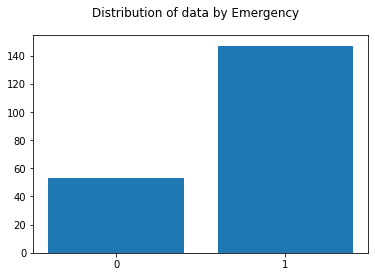

In [33]:
names = ['0','1']
plt.bar(names, emrgncy_df['Count'])
plt.suptitle('Distribution of data by Emergency')
plt.show()

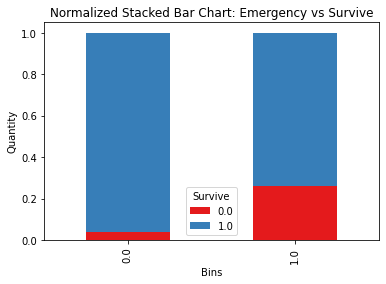

In [34]:
pal = sns.color_palette("Set1")

# creating a crosstab stacked bar chart variable
chart = pd.crosstab(full_df['Emergency'],full_df['Survive'])

# normalizing chart and plotting chart
chart.div(chart.sum(1).astype(float), axis=0).plot(kind='bar', color = pal,stacked=True)
plt.xlabel('Bins')
plt.ylabel('Quantity')
plt.title('Normalized Stacked Bar Chart: Emergency vs Survive')
plt.show()

In summary, we can observe that the **number of Survive patients decrease** as **AgeGroup or Infection or Emergency increases**.

## Feature Selection

To avoid overfitting, we use feature selection to filter out insignificant features. We will use 4 methods below and compare the resulting features all together.

In [35]:
feature_cols = ['Age','AgeGroup','Sex','Infection','SysBP','Pulse','Emergency']
X = full_df[feature_cols]
y = full_df.Survive

[0.25161609 0.06323777 0.04595198 0.04687219 0.28519063 0.24237733
 0.06475403]


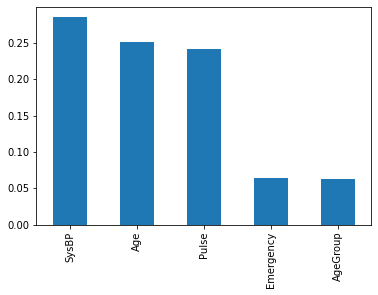

['SysBP', 'Age', 'Pulse', 'Emergency', 'AgeGroup']

In [40]:
# Extra Tree Classifier
from sklearn.ensemble import ExtraTreesClassifier

model = ExtraTreesClassifier()
model.fit(X, y)
print(model.feature_importances_)

feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(5).plot.bar()
plt.show()

etc_features = feat_importances.nlargest(5).keys().to_list()
etc_features

In [39]:
# Chi-square Test
from sklearn.feature_selection import SelectKBest 
from sklearn.feature_selection import chi2 

chi2_features = SelectKBest(chi2, k = 5) 
X_kbest_features = chi2_features.fit_transform(X, y)
mask = chi2_features.get_support()
new_feature = []
for bool, feature in zip(mask,X.columns):
    if bool:
        new_feature.append(feature)
chisq_features = new_feature
chisq_features

['Age', 'AgeGroup', 'Infection', 'SysBP', 'Emergency']

In [41]:
# Pearson Correlation

# Correlation with output variable
corr = full_df.corr()
cor_target = abs(corr["Survive"])

# Selecting highly correlated features
relevant_features = cor_target[cor_target>0.2]
pearson_features = relevant_features.keys().to_list()
pearson_features

['SysBP', 'Emergency', 'Survive']

In [42]:
full_df[['SysBP','Emergency']].corr()

,SysBP,Emergency
SysBP,1.000000,-0.184111
Emergency,-0.184111,1.000000


In [44]:
pearson_features = pearson_features[0:2]  # exclude Survive as it is our target variable
pearson_features

['SysBP', 'Emergency']

In [45]:
# Logit model
import statsmodels.api as sm

logit_model = sm.Logit(y,X)
result = logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.432487
         Iterations 7
                         Results: Logit
Model:              Logit            Pseudo R-squared: 0.136     
Dependent Variable: Survive          AIC:              186.9947  
Date:               2023-02-17 18:20 BIC:              210.0829  
No. Observations:   200              Log-Likelihood:   -86.497   
Df Model:           6                LL-Null:          -100.08   
Df Residuals:       193              LLR p-value:      0.00013478
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     7.0000                                       
------------------------------------------------------------------
               Coef.   Std.Err.     z     P>|z|    [0.025   0.975]
------------------------------------------------------------------
Age            1.1793    1.6308   0.7232  0.4696  -2.0170   4.3756
AgeGroup      -1.9749    1.1602  -1.7022  0.0887  -4.2488   0.

The p-values are <0.05 for 4 features (**AgeGroup, SysBP, Pulse, Emergency**)

In [46]:
logit_features = ['AgeGroup','SysBP','Pulse','Emergency']

In [47]:
results = [etc_features, chisq_features, pearson_features, logit_features]
methods = ['Extra_Tree_Classifier','Chi_Square','Pearson_Correlation','Logit_Model']
feat_selectn = pd.DataFrame(list(zip(methods,results)),columns=['Name','Features'])
feat_selectn

,Name,Features
0,Extra_Tree_Classifier,"[SysBP, Age, Pulse, Emergency, AgeGroup]"
1,Chi_Square,"[Age, AgeGroup, Infection, SysBP, Emergency]"
2,Pearson_Correlation,"[SysBP, Emergency]"
3,Logit_Model,"[AgeGroup, SysBP, Pulse, Emergency]"


Combining the results from the 4 feature selection models, it seems that SysBP, Emergency, Pulse, Age, and AgeGroup are the important features. However, since Age and AgeGroup are highly correlated, we will only be using 1 of them and since AgeGroup appears more in the feature selection results, we will use feature AgeGroup instead of Age.

The final list of features to be used is **SysBP, Emergency, Pulse, and AgeGroup**.

## 1. Logistic Regression

In [48]:
# Split dataset in features and target variable
feature_cols = ['SysBP','Emergency','Pulse','AgeGroup']
X = full_df[feature_cols] # Features
y = full_df.Survive # Target variable

In [49]:
X.shape, y.shape

((200, 4), (200,))

In [50]:
# Split X and y into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13)

In [51]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((160, 4), (40, 4), (160,), (40,))

In [52]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(penalty=None,solver='newton-cholesky',max_iter=1000,random_state=13)

# Fit the model
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)

In [53]:
y_pred

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1.])

In [69]:
from sklearn import metrics

def gen_cnf_matrix_heatmap(cnf_matrix, class_names):
    print(cnf_matrix)
    fig, ax = plt.subplots()

    # Create heatmap
    sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
    ax.set_xticklabels(class_names)
    ax.set_yticklabels(class_names)
    ax.xaxis.tick_top()
    ax.xaxis.set_label_position("top")
    plt.tight_layout()
    plt.title('Confusion matrix', y=1.1, pad=20)
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')
    plt.show()

[[31  0]
 [ 8  1]]


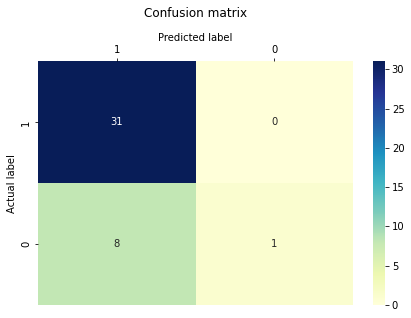

In [71]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred, labels=[1,0])
class_names=[1,0]
gen_cnf_matrix_heatmap(cnf_matrix, class_names)

In [55]:
from sklearn.metrics import classification_report
target_names = ['not survive', 'survive']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

 not survive       1.00      0.11      0.20         9
     survive       0.79      1.00      0.89        31

    accuracy                           0.80        40
   macro avg       0.90      0.56      0.54        40
weighted avg       0.84      0.80      0.73        40



We get a pretty high **accuracy** rate of 80%.

In this case, however, metrics that we should pay more attention to are the number of False Positive cases (not survive but predicted survive) and recall. The **recall** for Not Survive patients is only 11%, which means that among the patients who do not survive in the test set, the model can only identify 11% of them.

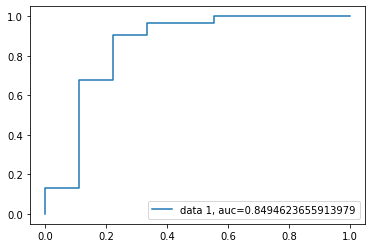

In [56]:
# ROC Classifier

y_pred_prob = logreg.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_prob)
auc = metrics.roc_auc_score(y_test, y_pred_prob)
plt.plot(fpr, tpr, label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

The AUC score for this classifier is 85% which implies that it is a pretty good classifier.

## 2. Decision Tree

Decision Tree is sensitive towards imbalanced dataset, and since our dataset is imbalanced, a decision tree model alone is not enough to make a good prediction model. Nonetheless, we'll first check the model performance using the imbalanced data directly to give us a baseline to compare the model performance later on.

In [57]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=13)

# Fit the data
dt = dt.fit(X_train,y_train)

y_pred_dt = dt.predict(X_test)

In [58]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_dt))

Accuracy: 0.65


Now we will optimise the model by picking out the best set of parameters (criterion x max_depth). We also add a class_weight of *'balanced'* to tackle the imbalanced dataset issue.

In [59]:
# Optimizing the model
criterion = ['gini', 'entropy', 'log_loss']
max_depth = list(range(1,160))  # max_depth = N-1
best_params = []
best_accuracy = 0.0

for x in criterion:
    for depth in max_depth:
        clf = DecisionTreeClassifier(criterion=x, max_depth=depth, class_weight='balanced',random_state=13)
        clf = clf.fit(X_train,y_train)
        y_pred_temp = clf.predict(X_test)
        accuracy_temp = metrics.accuracy_score(y_test, y_pred_temp)
        print("Accuracy for criterion ", x, " and max_depth ", depth, ":", accuracy_temp)
        if accuracy_temp > best_accuracy:
            best_accuracy = accuracy_temp
            best_params = [(x,depth,accuracy_temp)]
        elif accuracy_temp == best_accuracy:
            best_params.append((x,depth,accuracy_temp))
print('='*115)
print('Parameters with best accuracy obtained (criterion, max_depth, accuracy): ', ', '.join(str(x) for x in best_params))
print('='*115)

Accuracy for criterion  gini  and max_depth  1 : 0.475
Accuracy for criterion  gini  and max_depth  2 : 0.525
Accuracy for criterion  gini  and max_depth  3 : 0.75
Accuracy for criterion  gini  and max_depth  4 : 0.625
Accuracy for criterion  gini  and max_depth  5 : 0.675
Accuracy for criterion  gini  and max_depth  6 : 0.625
Accuracy for criterion  gini  and max_depth  7 : 0.65
Accuracy for criterion  gini  and max_depth  8 : 0.675
Accuracy for criterion  gini  and max_depth  9 : 0.625
Accuracy for criterion  gini  and max_depth  10 : 0.675
Accuracy for criterion  gini  and max_depth  11 : 0.65
Accuracy for criterion  gini  and max_depth  12 : 0.725
Accuracy for criterion  gini  and max_depth  13 : 0.725
Accuracy for criterion  gini  and max_depth  14 : 0.725
Accuracy for criterion  gini  and max_depth  15 : 0.725
Accuracy for criterion  gini  and max_depth  16 : 0.725
Accuracy for criterion  gini  and max_depth  17 : 0.725
Accuracy for criterion  gini  and max_depth  18 : 0.725
Accu

Accuracy for criterion  entropy  and max_depth  25 : 0.65
Accuracy for criterion  entropy  and max_depth  26 : 0.65
Accuracy for criterion  entropy  and max_depth  27 : 0.65
Accuracy for criterion  entropy  and max_depth  28 : 0.65
Accuracy for criterion  entropy  and max_depth  29 : 0.65
Accuracy for criterion  entropy  and max_depth  30 : 0.65
Accuracy for criterion  entropy  and max_depth  31 : 0.65
Accuracy for criterion  entropy  and max_depth  32 : 0.65
Accuracy for criterion  entropy  and max_depth  33 : 0.65
Accuracy for criterion  entropy  and max_depth  34 : 0.65
Accuracy for criterion  entropy  and max_depth  35 : 0.65
Accuracy for criterion  entropy  and max_depth  36 : 0.65
Accuracy for criterion  entropy  and max_depth  37 : 0.65
Accuracy for criterion  entropy  and max_depth  38 : 0.65
Accuracy for criterion  entropy  and max_depth  39 : 0.65
Accuracy for criterion  entropy  and max_depth  40 : 0.65
Accuracy for criterion  entropy  and max_depth  41 : 0.65
Accuracy for c

Accuracy for criterion  log_loss  and max_depth  50 : 0.65
Accuracy for criterion  log_loss  and max_depth  51 : 0.65
Accuracy for criterion  log_loss  and max_depth  52 : 0.65
Accuracy for criterion  log_loss  and max_depth  53 : 0.65
Accuracy for criterion  log_loss  and max_depth  54 : 0.65
Accuracy for criterion  log_loss  and max_depth  55 : 0.65
Accuracy for criterion  log_loss  and max_depth  56 : 0.65
Accuracy for criterion  log_loss  and max_depth  57 : 0.65
Accuracy for criterion  log_loss  and max_depth  58 : 0.65
Accuracy for criterion  log_loss  and max_depth  59 : 0.65
Accuracy for criterion  log_loss  and max_depth  60 : 0.65
Accuracy for criterion  log_loss  and max_depth  61 : 0.65
Accuracy for criterion  log_loss  and max_depth  62 : 0.65
Accuracy for criterion  log_loss  and max_depth  63 : 0.65
Accuracy for criterion  log_loss  and max_depth  64 : 0.65
Accuracy for criterion  log_loss  and max_depth  65 : 0.65
Accuracy for criterion  log_loss  and max_depth  66 : 0.

From the iteration above, we obtain the best **accuracy of 75%** using criterion gini, entropy or log_loss with max_depth 3—an improvement from the previous baseline accuracy of 65%.

In [60]:
clf = DecisionTreeClassifier(criterion='gini', max_depth=3, class_weight='balanced',random_state=13)
clf = clf.fit(X_train,y_train)
y_pred_clf = clf.predict(X_test)

print(classification_report(y_test, y_pred_clf, target_names=target_names))

clf_matrix = metrics.confusion_matrix(y_test, y_pred_clf, labels=[1,0])
print(clf_matrix)

              precision    recall  f1-score   support

 not survive       0.47      0.78      0.58         9
     survive       0.92      0.74      0.82        31

    accuracy                           0.75        40
   macro avg       0.69      0.76      0.70        40
weighted avg       0.82      0.75      0.77        40

[[23  8]
 [ 2  7]]


Let's try to use under-sampling to further improve the model performance.

In [64]:
# Under-Sampling
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter

# Randomly under-sample the majority class
rus = RandomUnderSampler(random_state=42)
X_train_rus, y_train_rus= rus.fit_resample(X_train, y_train)

# Check the number of records after under sampling
print(sorted(Counter(y_train_rus).items()))

[(0.0, 31), (1.0, 31)]


In [65]:
max_depth = list(range(1,31))  # max_depth = N-1
best_params_rus = []
best_accuracy_rus = 0.0

for x in criterion:
    for depth in max_depth:
        clf_rus = DecisionTreeClassifier(criterion=x, max_depth=depth, class_weight='balanced',random_state=13)
        clf_rus = clf_rus.fit(X_train_rus,y_train_rus)
        y_pred_temp = clf_rus.predict(X_test)
        accuracy_temp = metrics.accuracy_score(y_test, y_pred_temp)
        print("Accuracy for criterion ", x, " and max_depth ", depth, ":", accuracy_temp)
        if accuracy_temp > best_accuracy_rus:
            best_accuracy_rus = accuracy_temp
            best_params_rus = [(x, depth, accuracy_temp)]
        elif accuracy_temp == best_accuracy_rus:
            best_params_rus.append((x, depth, accuracy_temp))
print('='*115)
print('Parameters with best accuracy obtained (criterion, max_depth, accuracy): ', ', '.join(str(x) for x in best_params_rus))
print('='*115)

Accuracy for criterion  gini  and max_depth  1 : 0.9
Accuracy for criterion  gini  and max_depth  2 : 0.475
Accuracy for criterion  gini  and max_depth  3 : 0.525
Accuracy for criterion  gini  and max_depth  4 : 0.75
Accuracy for criterion  gini  and max_depth  5 : 0.65
Accuracy for criterion  gini  and max_depth  6 : 0.675
Accuracy for criterion  gini  and max_depth  7 : 0.675
Accuracy for criterion  gini  and max_depth  8 : 0.675
Accuracy for criterion  gini  and max_depth  9 : 0.675
Accuracy for criterion  gini  and max_depth  10 : 0.675
Accuracy for criterion  gini  and max_depth  11 : 0.675
Accuracy for criterion  gini  and max_depth  12 : 0.675
Accuracy for criterion  gini  and max_depth  13 : 0.675
Accuracy for criterion  gini  and max_depth  14 : 0.675
Accuracy for criterion  gini  and max_depth  15 : 0.675
Accuracy for criterion  gini  and max_depth  16 : 0.675
Accuracy for criterion  gini  and max_depth  17 : 0.675
Accuracy for criterion  gini  and max_depth  18 : 0.675
Accur

Using under-sampling, we obtain the best **accuracy of 90%** using criterion gini, entropy or log_loss with max_depth 1—a further improvement from the previous obtained accuracy of 75% and the best accuracy obtained thus far.

              precision    recall  f1-score   support

 not survive       1.00      0.56      0.71         9
     survive       0.89      1.00      0.94        31

    accuracy                           0.90        40
   macro avg       0.94      0.78      0.83        40
weighted avg       0.91      0.90      0.89        40

[[31  0]
 [ 4  5]]


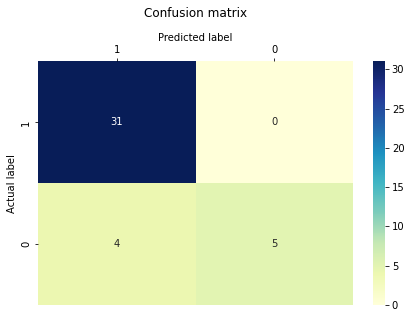

In [72]:
dt_rus = DecisionTreeClassifier(criterion='gini', max_depth=1, class_weight='balanced',random_state=13)
dt_rus = dt_rus.fit(X_train_rus,y_train_rus)
y_pred_rus = dt_rus.predict(X_test)

print(classification_report(y_test, y_pred_rus, target_names=target_names))

dt_rus_matrix = metrics.confusion_matrix(y_test, y_pred_rus, labels=[1,0])
class_names=[1,0]
gen_cnf_matrix_heatmap(dt_rus_matrix, class_names)

From the confusion matrix, we can see that the resulting decision tree model has successfully **reduced the False Positive case by half to 4** and **increase the recall rate of the Not Survive patients to 56%** as well.

## 3. Random Forest

Let's build a vanilla random forest as our baseline.

In [73]:
from sklearn.ensemble import RandomForestClassifier

In [74]:
rf = RandomForestClassifier(random_state=13)

# Fit the data
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)

print("Training score:", rf.score(X_train, y_train))
print("Test score", rf.score(X_test, y_test))
print("Accuracy:", metrics.accuracy_score(y_test, y_pred_rf))

Training score: 1.0
Test score 0.7
Accuracy: 0.7


In [75]:
# Fit the under-sampled data
rf.fit(X_train_rus, y_train_rus)

y_pred_rf_rus = rf.predict(X_test)

print("Training score:", rf.score(X_train_rus, y_train_rus))
print("Test score:", rf.score(X_test, y_test))
print("Accuracy:", metrics.accuracy_score(y_test, y_pred_rf_rus))

Training score: 1.0
Test score: 0.7
Accuracy: 0.7


Since the training scores are so high and the testing scores are not as close for both original and under-sampled data, there's a probability that the model is overfitting—the model is fitting the training data too well and not generalizing what it is learning.

Now let's tune our random forest classifier to improve the test accuracy.

Since random forest is built upon decision trees and that it is sensitive to data imbalance as well, moving forward we will use under-sampled data to train our dataset just like in decision tree.

In [76]:
# Number of trees
n_estimators = np.linspace(100, 3000, int((3000-100)/200) + 1, dtype=int)

# Maximum number of levels in tree
max_depth = [1, 5, 10, 20, 50, 75, 100, 150, 200]

# Minimum number of samples required to split a node
min_samples_split = [1, 2, 5, 10, 15, 20, 30]

# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 3, 4]

# Method of selecting samples for training each tree
bootstrap = [True, False]

# Criterion
criterion=['gini', 'entropy', 'log_loss']

random_grid = {'n_estimators': n_estimators,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap,
               'criterion': criterion}
random_grid

{'n_estimators': array([ 100,  307,  514,  721,  928, 1135, 1342, 1550, 1757, 1964, 2171,
        2378, 2585, 2792, 3000]),
 'max_depth': [1, 5, 10, 20, 50, 75, 100, 150, 200],
 'min_samples_split': [1, 2, 5, 10, 15, 20, 30],
 'min_samples_leaf': [1, 2, 3, 4],
 'bootstrap': [True, False],
 'criterion': ['gini', 'entropy', 'log_loss']}

In [77]:
from sklearn.model_selection import RandomizedSearchCV

rf_base = RandomForestClassifier(random_state=13)
rf_random = RandomizedSearchCV(estimator = rf_base,
                               param_distributions = random_grid,
                               n_iter = 30, cv = 5,
                               verbose=2,
                               random_state=13, n_jobs = 4)
rf_random.fit(X_train_rus, y_train_rus)

print("Best set of parameters: ", rf_random.best_params_)
print("Training score:", rf_random.score(X_train_rus, y_train_rus))
print("Test score:", rf_random.score(X_test, y_test))

Fitting 5 folds for each of 30 candidates, totalling 150 fits
Best set of parameters:  {'n_estimators': 1964, 'min_samples_split': 1, 'min_samples_leaf': 4, 'max_depth': 5, 'criterion': 'gini', 'bootstrap': False}
Training score: 0.9032258064516129
Test score: 0.65


Now let's use GridSearch to find a more optimal set of parameters.

In [78]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': np.linspace(1900, 2100, 5, dtype = int),
    'max_depth': [1, 2, 3, 5, 7, 10],
    'min_samples_split': [1, 2, 3],
    'min_samples_leaf': [3, 4, 5, 6]
}

# Base model
rf_grid = RandomForestClassifier(criterion = 'gini', bootstrap = False, random_state=13)

# Instantiate the grid search model
grid_rf_search = GridSearchCV(estimator = rf_grid, 
                              param_grid = param_grid, 
                              cv = 5, n_jobs = 8, 
                              verbose = 2)
grid_rf_search.fit(X_train_rus, y_train_rus)

best_rf_grid = grid_rf_search.best_estimator_
print("Best set of parameters: ", grid_rf_search.best_params_)
print("Training score:", grid_rf_search.score(X_train_rus, y_train_rus))
print("Test score", grid_rf_search.score(X_test, y_test))

[CV] END bootstrap=True, criterion=gini, max_depth=1, min_samples_leaf=4, min_samples_split=2, n_estimators=1757; total time=   2.2s
[CV] END bootstrap=True, criterion=gini, max_depth=1, min_samples_leaf=4, min_samples_split=2, n_estimators=1757; total time=   2.1s
[CV] END bootstrap=True, criterion=gini, max_depth=1, min_samples_leaf=1, min_samples_split=15, n_estimators=3000; total time=   3.7s
[CV] END bootstrap=True, criterion=gini, max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=2378; total time=   3.4s
[CV] END bootstrap=True, criterion=gini, max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=2378; total time=   5.2s
[CV] END bootstrap=True, criterion=entropy, max_depth=1, min_samples_leaf=3, min_samples_split=5, n_estimators=1342; total time=   2.0s
[CV] END bootstrap=False, criterion=entropy, max_depth=10, min_samples_leaf=4, min_samples_split=20, n_estimators=1135; total time=   1.3s
[CV] END bootstrap=False, criterion=entropy, max_depth=10

Fitting 5 folds for each of 360 candidates, totalling 1800 fits
[CV] END max_depth=1, min_samples_leaf=3, min_samples_split=1, n_estimators=1900; total time=   3.4s
[CV] END max_depth=1, min_samples_leaf=3, min_samples_split=1, n_estimators=1950; total time=   3.6s
[CV] END max_depth=1, min_samples_leaf=3, min_samples_split=1, n_estimators=2050; total time=   4.4s
[CV] END max_depth=1, min_samples_leaf=3, min_samples_split=1, n_estimators=2100; total time=   4.4s
[CV] END max_depth=1, min_samples_leaf=3, min_samples_split=2, n_estimators=2000; total time=   4.0s
[CV] END max_depth=1, min_samples_leaf=3, min_samples_split=2, n_estimators=2100; total time=   4.7s
[CV] END max_depth=1, min_samples_leaf=3, min_samples_split=3, n_estimators=1900; total time=   4.0s
[CV] END max_depth=1, min_samples_leaf=3, min_samples_split=3, n_estimators=2000; total time=   4.1s
[CV] END max_depth=1, min_samples_leaf=3, min_samples_split=3, n_estimators=2050; total time=   4.2s
[CV] END max_depth=1, min_s

[CV] END max_depth=3, min_samples_leaf=3, min_samples_split=2, n_estimators=2100; total time=   6.7s[CV] END max_depth=1, min_samples_leaf=3, min_samples_split=1, n_estimators=1900; total time=   3.5s
[CV] END max_depth=1, min_samples_leaf=3, min_samples_split=1, n_estimators=2000; total time=   3.7s
[CV] END max_depth=1, min_samples_leaf=3, min_samples_split=1, n_estimators=2100; total time=   4.5s
[CV] END max_depth=1, min_samples_leaf=3, min_samples_split=2, n_estimators=1900; total time=   3.9s
[CV] END max_depth=1, min_samples_leaf=3, min_samples_split=2, n_estimators=2000; total time=   4.0s
[CV] END max_depth=1, min_samples_leaf=3, min_samples_split=2, n_estimators=2050; total time=   4.5s
[CV] END max_depth=1, min_samples_leaf=3, min_samples_split=3, n_estimators=1900; total time=   4.0s
[CV] END max_depth=1, min_samples_leaf=3, min_samples_split=3, n_estimators=1950; total time=   3.9s
[CV] END max_depth=1, min_samples_leaf=3, min_samples_split=3, n_estimators=2050; total time

[CV] END max_depth=3, min_samples_leaf=3, min_samples_split=3, n_estimators=1900; total time=   6.0s[CV] END max_depth=1, min_samples_leaf=3, min_samples_split=1, n_estimators=1900; total time=   3.5s
[CV] END max_depth=1, min_samples_leaf=3, min_samples_split=1, n_estimators=2000; total time=   3.7s
[CV] END max_depth=1, min_samples_leaf=3, min_samples_split=1, n_estimators=2050; total time=   4.4s
[CV] END max_depth=1, min_samples_leaf=3, min_samples_split=2, n_estimators=1900; total time=   4.0s
[CV] END max_depth=1, min_samples_leaf=3, min_samples_split=2, n_estimators=1950; total time=   3.9s
[CV] END max_depth=1, min_samples_leaf=3, min_samples_split=2, n_estimators=2050; total time=   4.5s
[CV] END max_depth=1, min_samples_leaf=3, min_samples_split=2, n_estimators=2100; total time=   4.4s
[CV] END max_depth=1, min_samples_leaf=3, min_samples_split=3, n_estimators=2000; total time=   4.0s
[CV] END max_depth=1, min_samples_leaf=3, min_samples_split=3, n_estimators=2050; total time

[CV] END max_depth=1, min_samples_leaf=5, min_samples_split=1, n_estimators=1900; total time=   4.2s
[CV] END max_depth=1, min_samples_leaf=5, min_samples_split=1, n_estimators=2000; total time=   4.8s
[CV] END max_depth=1, min_samples_leaf=5, min_samples_split=1, n_estimators=2050; total time=   5.4s
[CV] END max_depth=1, min_samples_leaf=5, min_samples_split=2, n_estimators=1900; total time=   4.9s
[CV] END max_depth=1, min_samples_leaf=5, min_samples_split=2, n_estimators=2000; total time=   4.1s
[CV] END max_depth=1, min_samples_leaf=5, min_samples_split=2, n_estimators=2050; total time=   4.9s
[CV] END max_depth=1, min_samples_leaf=5, min_samples_split=3, n_estimators=1900; total time=   5.4s
[CV] END max_depth=1, min_samples_leaf=5, min_samples_split=3, n_estimators=1950; total time=   5.2s
[CV] END max_depth=1, min_samples_leaf=5, min_samples_split=3, n_estimators=2050; total time=   5.0s
[CV] END max_depth=1, min_samples_leaf=6, min_samples_split=1, n_estimators=1900; total tim

[CV] END max_depth=3, min_samples_leaf=3, min_samples_split=3, n_estimators=1900; total time=   6.0s[CV] END max_depth=1, min_samples_leaf=3, min_samples_split=1, n_estimators=1950; total time=   3.6s
[CV] END max_depth=1, min_samples_leaf=3, min_samples_split=1, n_estimators=2050; total time=   3.8s
[CV] END max_depth=1, min_samples_leaf=3, min_samples_split=1, n_estimators=2100; total time=   4.6s
[CV] END max_depth=1, min_samples_leaf=3, min_samples_split=2, n_estimators=1950; total time=   4.0s
[CV] END max_depth=1, min_samples_leaf=3, min_samples_split=2, n_estimators=2000; total time=   4.1s
[CV] END max_depth=1, min_samples_leaf=3, min_samples_split=2, n_estimators=2100; total time=   4.7s
[CV] END max_depth=1, min_samples_leaf=3, min_samples_split=3, n_estimators=1950; total time=   4.1s
[CV] END max_depth=1, min_samples_leaf=3, min_samples_split=3, n_estimators=2000; total time=   4.0s
[CV] END max_depth=1, min_samples_leaf=3, min_samples_split=3, n_estimators=2100; total time

[CV] END max_depth=3, min_samples_leaf=3, min_samples_split=3, n_estimators=1900; total time=   6.1s[CV] END max_depth=1, min_samples_leaf=3, min_samples_split=1, n_estimators=1950; total time=   3.6s
[CV] END max_depth=1, min_samples_leaf=3, min_samples_split=1, n_estimators=2000; total time=   3.7s
[CV] END max_depth=1, min_samples_leaf=3, min_samples_split=1, n_estimators=2100; total time=   4.6s
[CV] END max_depth=1, min_samples_leaf=3, min_samples_split=2, n_estimators=1950; total time=   4.0s
[CV] END max_depth=1, min_samples_leaf=3, min_samples_split=2, n_estimators=2000; total time=   4.1s
[CV] END max_depth=1, min_samples_leaf=3, min_samples_split=2, n_estimators=2100; total time=   4.7s
[CV] END max_depth=1, min_samples_leaf=3, min_samples_split=3, n_estimators=1900; total time=   4.0s
[CV] END max_depth=1, min_samples_leaf=3, min_samples_split=3, n_estimators=2000; total time=   4.1s
[CV] END max_depth=1, min_samples_leaf=3, min_samples_split=3, n_estimators=2100; total time

[CV] END max_depth=3, min_samples_leaf=3, min_samples_split=3, n_estimators=1950; total time=   6.2sBest set of parameters:  {'max_depth': 5, 'min_samples_leaf': 3, 'min_samples_split': 1, 'n_estimators': 1900}
Training score: 0.9193548387096774
Test score 0.675


Now let's fit the data into random forest with the best set of parameters obtained above.

              precision    recall  f1-score   support

 not survive       0.39      0.78      0.52         9
     survive       0.91      0.65      0.75        31

    accuracy                           0.68        40
   macro avg       0.65      0.71      0.64        40
weighted avg       0.79      0.68      0.70        40

[[20 11]
 [ 2  7]]


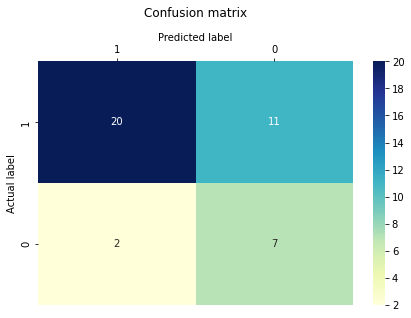

In [80]:
rf_opt = RandomForestClassifier(criterion = 'gini', max_depth=5, min_samples_leaf=3, min_samples_split=1, n_estimators=1900, 
                            bootstrap = False)
rf_opt = rf_opt.fit(X_train_rus,y_train_rus)
y_pred_rf_opt_rus = rf_opt.predict(X_test)

print(classification_report(y_test, y_pred_rf_opt_rus, target_names=target_names))

rf_opt_matrix = metrics.confusion_matrix(y_test, y_pred_rf_opt_rus, labels=[1,0])
class_names=[1,0]
gen_cnf_matrix_heatmap(rf_opt_matrix, class_names)


Although the number of **False Positive** cases **(2)** and **recall** of Not Survive patients **(78%)** are the best so far, the accuracy of this random forest model is rather poor (lowest so far, at **68%**).

## Conclusion

In [122]:
models = ['Logistic Regression', 'Decision Tree', 'Decision Tree (under-sampled)', 'Random Forest (under-sampled)']
accuracy_list = [0.80, 0.75, 0.90, 0.68]
fp_num = [8, 2, 4, 2]
recall_0 = [0.11, 0.78, 0.56, 0.78]
recall_1 = [1.0, 0.74, 1.0, 0.65]
precision_0 = [1.0, 0.47, 1.0, 0.39]
precision_1 = [0.79, 0.92, 0.89, 0.91]

In [123]:
model_res = pd.DataFrame(list(zip(models, accuracy_list, fp_num, recall_0, recall_1, precision_0, precision_1)),
                         columns=['Models','Accuracy','False Positive','Recall_0','Recall_1','Precision_0',
                                  'Precision_1'])
model_res

,Models,Accuracy,False Positive,Recall_0,Recall_1,Precision_0,Precision_1
0,Logistic Regression,0.80,8,0.11,1.00,1.00,0.79
1,Decision Tree,0.75,2,0.78,0.74,0.47,0.92
2,Decision Tree (under-sampled),0.90,4,0.56,1.00,1.00,0.89
3,Random Forest (under-sampled),0.68,2,0.78,0.65,0.39,0.91


By comparing the performance metrics of the models (Logistic Regression, Decision Tree, Random Forest), I would select **Decision Tree model (trained with under-sampled data)** as my **final model**.

Besides having the best accuracy from the other models, it also has the best combination of recalls and precisions as compared to the rest. 